### Assignment 8

### Exercise 33

Initial understanding was that we have calculated for that 1.2 payoff with the appropriate values of $\Delta_0$ and $\beta_0$ for the payoff to be equal to the stock price at time 1. 

The option is purchased, now we want to make it so we have 1.2 in the riskless account.

We can sell -0.3 of the stock at time 0 to provide 1.2 funds for the riskless account. We then invest that, wait a time period and the wealth can be the outcome of either:

"Whatever you get, you have to compensate for it"

I calculated,

$$\varphi = (\beta = 1.2, \delta_0 = 0)$$

I think this may be wrong though, if we need to include the payoff value with this calculation we would need to workout what the payoff for each outcome would be.

$$V_1(H) = 3$$

$$V_1(T) = 0$$


**Corrected after Class:**

When i worked it out before, I just calculated simaltanous equations without taking into account payoff. e.g. just a normal wealth calculation with Heads and Tails outcomes but with no account to the payoff. Thats how I got delta to be equal to 0. 

What I learn now, is we need all the capital to be equal to value specified in the question. This means we add on $V_1$ for both outcomes, then calculate the simaltaneous equations like so:

The question states, ""we want a value of $\frac{5}{4} * 1.2$ **after** the payoff""


$$X_1^\varphi(H) = 1.5$$

$$X_1^\varphi(T) = 1.5$$

Both of these are equal to eachother, so we just set them equal to eachother with the equations

$$X_1^\varphi(X) = |\beta_0 * (1+r) + \Delta_0 * S_1(X) + V_1(X)$$

Which gives us:

$$X_1^\varphi(H) = |\beta_0 * (1+r) + \Delta_0 * S_1(H) + V_1(H)$$

$$X_1^\varphi(T) = |\beta_0 * (1+r) + \Delta_0 * S_1(T) + V_1(T)$$

Taking these away and calculating the simaltanous equations gives us:

$$\Delta_0 = -0.5$$

Which we can just plug back into the equation to obtain:

$$\beta_0 = 2$$

$$\therefore \varphi = (\beta = 2, \delta_0 = -0.5)$$

I was on the right tracks, just didnt take into account that the idea of wealth can include the values or wealth you obtain from options. I guess in this example we are given that she doesnt use any of the wealth to but the option from the question its bought independantly. That is what I initially got confused about.

### Exercise 34

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
def Stockprice(sample_size,S_0,u,d,ptilde):

    
    stocks = np.random.choice([u*S_0,d*S_0],p=[1-ptilde,ptilde],size=sample_size)
    return stocks

As we are using MonteCarlos to price this, we need to find out the $B_0$ value correct?
Noo!!! That is just the interest rate of the bank at that point!

### Exercise 34 part 2

Essentially, there are two ways to calculate the option price when we sample prices.

What do we sample you ask? 
Well its just the outcomes of tha Heads and tails flips. 

We calculate, "Hmm, what prices could this be?"

The formula for the $V_0$ price is :


$$\tilde{E}\bigg[\frac{V_n}{B_n}\bigg]$$

So we need to calculate the expected value, over the interest rate many times and mean that? Okay 


In [103]:
S_0 = 4
u = 2
d = 1/2
r = 1/4
N = 1
K = 5
ptilde = (1 + r - d) / (u-d) 
sample_size = 10_000


In [104]:
Stocks = Stockprice(sample_size,S_0,u,d,ptilde) #You need to find the option price!
#Obtained the stock values.
#Now we need the put value which is just K - S1,
#

Stocks = np.maximum(0,K - Stocks)
print(Stocks)
Stocks = Stocks / (1+r)**N
print(Stocks)
Stocks = np.cumsum(Stocks)
Stocks = Stocks / np.arange(1,sample_size+1)
Stocks.mean()

[3. 3. 3. ... 0. 3. 3.]
[2.4 2.4 2.4 ... 0.  2.4 2.4]


1.2131549109712008

In [105]:
def MCStockprice(S_0,u,d,r,N,K,ptilde,sample_size):
    Stocks = Stockprice(sample_size,S_0,u,d,ptilde) #You need to find the option price!
    Stocks = np.maximum(0,K - Stocks)
    Stocks = Stocks / (1+r)**N
    Stocks = np.cumsum(Stocks)
    Stocks = Stocks / np.arange(1,sample_size+1)
    return Stocks.mean()
    

In [106]:
MCStockprice(S_0,u,d,r,N,K,ptilde,sample_size)

1.176324503746087

Finally, for the analyitcal method we use that combinational method we have in the same line Colloray 105 **8.12/8.17**

$$\frac{1}{B_N} * \sum_{k=0}^N {N\choose k}\tilde{p}*(1 - \tilde{p})^{N-k}* v(S_0*u^k*d^{N-K})$$

Remember, that function v is just the $V_n = v(S_n)$

So im not sure what we do when there is a value inside the function. I guess we just specify the payoff value? ignoring the fluff inside the $v(S_0*u^k*d^{N-K})$ function and just focus on the $V_1$ payoff.

For every K in k to n, we calculate the choose values of these:


In [107]:
for k in range(N+1):
    Summation = 0
    payoffN = (S_0*(u**N)*(d**(N-k)))
    value = (ptilde**k) * ((1-ptilde)**(N-k)) * (K - payoffN)
    Summation = Summation + (math.comb(N,k)*value)

    

Summation = Summation / (1+r)**N
print(-Summation)
#Why is this negative?

1.2


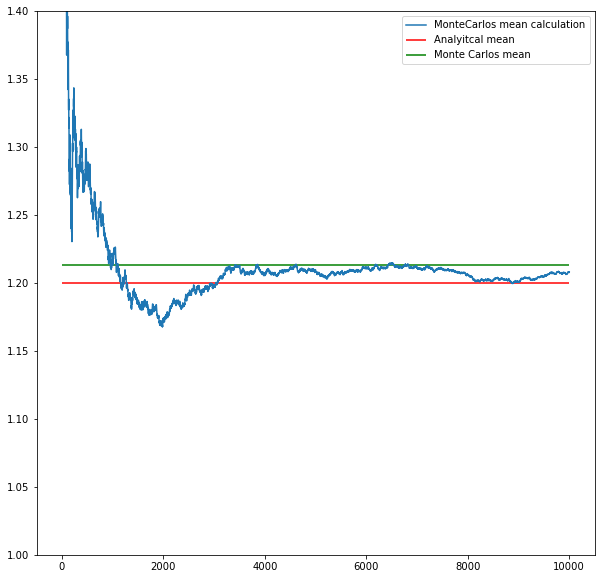

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.arange(1,sample_size+1),Stocks)
ax.set_ylim(1.0,1.4)
ax.hlines(-Summation,xmin=0,xmax=sample_size,color='red')
ax.hlines(Stocks.mean(),xmin=0,xmax=sample_size,color='green')
ax.legend(["MonteCarlos mean calculation","Analyitcal mean","Monte Carlos mean"])

### Exercise 35

I believe, this just means calculate a european call option, rather than a put. Which is just as simple as reversing the payoff value which is the payoff - k insead of k - payoff

In [109]:
for k in range(N+1):
    Summation = 0
    payoffN = (S_0*(u**N)*(d**(N-k)))
    value = (ptilde**k) * ((1-ptilde)**(N-k)) * (payoffN - K)
    Summation = Summation + (math.comb(N,k)*value)

    

Summation = Summation / (1+r)**N
print(-Summation)
#Why is this negative?

-1.2
